# Facilities

District-level information was obtained online, through the Ministry of Finance online "Fiscal Transfers" database <cite data-cite="otims_2018"><a href="https://github.com/alexgoodell/uganda-model/blob/master/refs/cite-md/otims_2018.md">(otims_2018)</a></cite>. Health facility information was obtained from the 2017 Health Facility Master List, which we found on the document-sharing website Scribd.com <cite data-cite="mohdhi2017"><a href="https://github.com/alexgoodell/uganda-model/blob/master/refs/cite-md/mohdhi2017.md">(mohdhi2017)</a></cite>. Data was extracted with the Tabula software <cite data-cite="tabula_2018"><a href="https://github.com/alexgoodell/uganda-model/blob/master/refs/cite-md/tabula_2018.md">(tabula_2018)</a></cite>.

### Master facility list pre-processing
After extraction, data from the master facility list were compared against summary tables from the same document to identify any missing data. Changes were needed in four districts:
1. The Health Facility Master List claimed that there were 32 operating health facilities in the __Amuru__ district, but did not list any. For this district, 26 facilities were identified from the budgeting office data <cite data-cite="otims_2016"><a href="https://github.com/alexgoodell/uganda-model/blob/master/refs/cite-md/otims_2016.md">(otims_2016)</a></cite>. An additional three facilities (for a total of 29) were identified from 2012 health infastructure data: ST. AUGUSTINE Health Center II, Otwee Health Center III, and Pabbo Health Centre III <cite data-cite="hid2012"><a href="https://github.com/alexgoodell/uganda-model/blob/master/refs/cite-md/hid2012.md">(hid2012)</a></cite>. There were assigned a sub-county NHPI of SC8ZISZD6 (Amuru town council, Amoyokoma Parish)
2. There were also no facilities listed for the __Kibaale__ district, though the document listed 16 facilities (7 of which are HCIII, 1 HC IV, 1 hospital) in a summary table (Table 8). This is a new district, created in July 2016, when the previous Kibaale District was split into Kagadi, Kakumiro and Kibaale. Eight facilities were identified in the budgeting data <cite data-cite="otims_2016"><a href="https://github.com/alexgoodell/uganda-model/blob/master/refs/cite-md/otims_2016.md">(otims_2016)</a></cite>, and two additional were identified with the infastructure data <cite data-cite="hid2012"><a href="https://github.com/alexgoodell/uganda-model/blob/master/refs/cite-md/hid2012.md">(hid2012)</a></cite>. This process thus identified a total of 5 HC III's, 1 HC IV, and 1 hospital. There were assigned a sub-country of SCLMS8IG1 (Kibaale town council, Ruguuza Parish).
3. The __Mityana__ district was missing its 24th facility, reporting 65 of 66 facilities. According to table 5, this district has a hospital. After reviewing the budgeting data, Mityana Hospital was identified and added to our database. It was assigned a random sub-county within Mityana: SC96Q5BX1 (Bulera Subcounty, Kakonde Parish)
4. Three facilites in the __Mukono__ district (68: Royal Family Clinic Clinic, 88:	Trinity Clinic Clinic, 91: Vine Medical centre Clinic) did not have a sub-county NHPI. These facilities were assigned a sub-county NHPI of SCTMPU7S6 (for the Mukono Municipality, Nantaburirwa Parish).

In [1]:
# Import dependencies
import sys, os
sys.path.append(os.path.join(os.path.dirname(''), '..'))
from lib.dependencies import *
from lib import stats_util as su
import config
import json

In [2]:
# Let's start a dataframe with district information. 
# I've gotten most of this data from http://www.budget.go.ug/fiscal_transfers
# The following is the code that was used to create the file -- no longer in use, just grab the CSV

'''
# get the population data as skeleton - create dataframe
url = 'http://www.budget.go.ug/fiscal_transfers/variable/show_dataset/var/MjA3'
page = urllib2.urlopen(url).read()
soup = BeautifulSoup(page, "html5lib")
table = soup.select_one("table.dataset")
# headers = [th.text.encode("utf-8") for th in table.select("tr th")]
districts = pd.read_html(str(table))[0]
districts = districts.set_index('Vote code')

# urls for the remaining columns we want
urls = [ 
# hard to reach
'http://www.budget.go.ug/fiscal_transfers/variable/show_dataset/var/OTA3',
# pop per health fac    
'http://www.budget.go.ug/fiscal_transfers/variable/show_dataset/var/Mjc3',
# rural pop
'http://www.budget.go.ug/fiscal_transfers/variable/show_dataset/var/NjA3',
# public hospitals
'http://www.budget.go.ug/fiscal_transfers/variable/show_dataset/var/MDQ4',
# is district?
'http://www.budget.go.ug/fiscal_transfers/variable/show_dataset/var/MzU2',
# poverty headcount
'http://www.budget.go.ug/fiscal_transfers/variable/show_dataset/var/NDMy',
# is municiplality
'http://www.budget.go.ug/fiscal_transfers/variable/show_dataset/var/NDc2',
# distance from kampala (cities)
'http://www.budget.go.ug/fiscal_transfers/variable/show_dataset/var/Njc2',
# distance from kampala (districts)
'http://www.budget.go.ug/fiscal_transfers/variable/show_dataset/var/OTU2'
]

for url in urls:
    page = urllib2.urlopen(url).read()
    soup = BeautifulSoup(page, "html5lib")
    table = soup.select_one("table.dataset")
    nd = pd.read_html(str(table))[0]
    nd = nd.set_index('Vote code')
    districts = pd.concat([districts, nd], axis=1)

# Remove duplicated columns
districts = districts.loc[:,~districts.columns.duplicated()]

# Export
districts.to_csv("districts_20-March-2018.csv")

'''

districts = pd.read_csv(config.data_path + '/budget-office/districts_20-March-2018.csv')

rename = {
'Region': 'region_name',
'District': 'district_name',
# can't use abbv "pop" on its own bc protected var
'Population (2015/16)': 'population', 
'Hard to Reach, Hard to Stay (2015/16)': 'is_hard_to_reach',
'Population per health facility (2015/16)': 'pop_per_health_fac',
'Rural Population (2015/16)': 'rural_pop',
'Constant (Public or PNFP Hospitals) (2015/16)': 'public_hosp',
'Constant (District) (2015/16)': 'is_district', 
'Poverty Headcount (2015/16)': 'poverty_pop',
'Constant (Municipality) (2015/16)': 'is_city',
'Distance from Kampala (Municipality) (2015/16)': 'distance_from_kampala_city',
'Distance from Kampala (District) (2015/16)': 'distance_from_kampala_district' 
}

# Rename columns to more useful 
districts = districts.rename(columns=rename)

# Combined distance from kampala (different columns for same variable)
districts['distance_from_kampala'] = districts['distance_from_kampala_district'] + districts['distance_from_kampala_city'] 
districts = districts.drop(columns=['distance_from_kampala_district','distance_from_kampala_city'])

districts = su.clean_columns(districts)

# seperate municipalities - 2 is true for is_district
municipalities = districts[districts.is_city == 1]
districts = districts[districts.is_district == 2]

# Unfortunately, this list of districts did not include a row for kampala! 
# I will add this manually here....
# get another district in the central region
import copy
d = copy.deepcopy(districts.loc[districts.district_name == 'Bukomansimbi District']) # deep copy
d['district_name'] = 'Kampala District'
# population per (UBS2017) https://github.com/alexgoodell/uganda-model/blob/master/docs/imgs/szh7lzsIKv.jpg
d['population'] = 1528800
# per 2014 census
d['rural_pop'] = 0
# these are by subregion, so easy to fill out - also see 
# https://github.com/alexgoodell/uganda-model/blob/master/docs/imgs/LSYQYveANZ.jpg
d['poverty_pop'] = 0.037
d['is_district'] = 2
d['is_city'] = 0
d['public_hosp'] = 1
d['distance_from_kampala'] = 0
d['is_hard_to_reach'] = 0
d['vote_code'] = 122
# below estimate from ~1392 health units UBS2017
d['pop_per_health_fac'] = 1098.0
# facilities = districts.append(d, ignore_index=True)
districts = districts.append(d, ignore_index=True)


# Add an ALL CAPS district name (this is used by the .dbf file)
def fmt_dist(x):
    return str(x).split("District")[0].strip().upper()
districts.loc[:,"district_name_all_caps"] = districts.district_name.apply(fmt_dist)

# Percent rural
districts["prop_rural"] = np.divide(districts['rural_pop'],districts['population'])
districts

,vote_code,region_name,district_name,population,is_hard_to_reach,pop_per_health_fac,rural_pop,public_hosp,is_district,poverty_pop,is_city,distance_from_kampala,district_name_all_caps,prop_rural
0,573,Northern Region,Abim District,1.294000e+05,1,6810.526367,108700.244141,1,2,0.742,0,840.0,ABIM,0.840033
1,501,Northern Region,Adjumani District,2.395000e+05,1,7044.117676,195155.629883,1,2,0.423,0,914.0,ADJUMANI,0.814846
2,611,Northern Region,Agago District,2.379000e+05,1,5802.438965,207337.515625,1,2,0.354,0,856.0,AGAGO,0.871532
3,588,Northern Region,Alebtong District,2.420000e+05,0,11000.000000,234927.570312,0,2,0.354,0,750.0,ALEBTONG,0.970775
4,564,Northern Region,Amolatar District,1.616000e+05,0,12430.769531,138026.873047,0,2,0.354,0,792.0,AMOLATAR,0.854127
5,581,Northern Region,Amudat District,1.271000e+05,1,12710.000000,113919.257812,0,2,0.742,0,820.0,AMUDAT,0.896296
6,565,Eastern Region,Amuria District,2.964000e+05,0,8010.811035,288659.751953,0,2,0.247,0,664.0,AMURIA,0.973886
7,570,Northern Region,Amuru District,2.053000e+05,1,5865.714355,194629.738281,0,2,0.354,0,756.0,AMURU,0.948026
8,502,Northern Region,Apac District,3.575771e+05,0,10516.973633,349230.191406,1,2,0.354,0,518.0,APAC,0.976657
9,503,Northern Region,Arua District,7.790000e+05,0,12365.079102,779000.002930,0,2,0.423,0,958.0,ARUA,1.000000


In [3]:
# Import the data from the mohdhi2017 facilities list - using excel because CSV caused 
# line-splitting problems (some cells have returns)
facilities = pd.read_excel(config.data_path + "/moh-div-health-info/facilities.xlsx", sheet_name="facilities", header=0)

# make splitter function
splitter = lambda x: pd.Series([i for i in reversed(x.split('/'))])

# split HSDT Code (see page 7 of mohdhi2017 for details of HSDT codes)
# note: after data cleaning, some facilities required manual setting of subcounty NHPI.
# This was accomplished by setting the facility HSDT code to SCXXXXXX/NA/NA, where X's = SC NHPI
facilities[['parish_level_fac_id', 'parish_nhpi', 'subcounty_nhpi']] = facilities['HSDT Code'].apply(splitter)

# drop uneeded columns
facilities = facilities.drop(columns={'District_name'})

# Load the subcounty list - used to link facilities to their district
subcounties = pd.read_csv(config.data_path + "/moh-div-health-info/subcounties.csv")
rename = {'NHPI Code': 'subcounty_nhpi', 'Name': 'subcounty_name', 
          'HSDT Code': 'subcounty_full_hsdt_code', 'County': 'county_name', 
          'District': 'district_name',
          'Subregion': 'subregion_name'}
subcounties = subcounties.rename(columns=rename)
subcounties = subcounties.drop(columns={'#'})
subcounties.subcounty_nhpi = subcounties.subcounty_nhpi.str.strip()

# Add the subcounty data to the facilites list
# This will allow us to link the facilites to their district
facilities = facilities.join(subcounties.set_index('subcounty_nhpi'), on="subcounty_nhpi", how="left")

# Fix the whitespace in the column names, replace strings with underscore
facilities = su.clean_columns(facilities)

facilities.head(2).T

len(pd.unique(districts.district_name))

122

In [4]:
# Add the district data from above to the facilities dataframe
facilities = facilities.join(districts.set_index('district_name'), 
                             on="district_name",
                             how="left")
facilities

,db_id,id_within_district,hsd,name,level,authority,ownership,nhpi_code,hsdt_code,source,...,is_hard_to_reach,pop_per_health_fac,rural_pop,public_hosp,is_district,poverty_pop,is_city,distance_from_kampala,district_name_all_caps,prop_rural
0,0.0,1,Labwor HSD,Abim General Hospital,Hospital,MOH,Govt,HFA6Q7GB2,SCL79ULU0/PA95VLAL8/8001,mohdhi2017,...,1.0,6810.526367,108700.244141,1.0,2.0,0.742,0.0,840.0,ABIM,0.840033
1,1.0,2,Labwor HSD,Adea Health Centre II,HC II,MOH,Govt,HFZW8MEX9,SC5AFV6Y8/PALG8WW26/8001,mohdhi2017,...,1.0,6810.526367,108700.244141,1.0,2.0,0.742,0.0,840.0,ABIM,0.840033
2,2.0,3,Labwor HSD,Alerek Health Centre III,HC III,MOH,Govt,HF7929IC0,SC6R9JA36/PAPF4WK97/8001,mohdhi2017,...,1.0,6810.526367,108700.244141,1.0,2.0,0.742,0.0,840.0,ABIM,0.840033
3,3.0,4,Labwor HSD,Amita Health Centre II,HC II,MOH,Govt,HF6UQL949,SC4CK4A96/PAU7GHJT5/8001,mohdhi2017,...,1.0,6810.526367,108700.244141,1.0,2.0,0.742,0.0,840.0,ABIM,0.840033
4,4.0,5,Labwor HSD,Atunga Health Centre II,HC II,MOH,Govt,HFVQXNJN9,SC4CK4A96/PA9LUCGP9/8001,mohdhi2017,...,1.0,6810.526367,108700.244141,1.0,2.0,0.742,0.0,840.0,ABIM,0.840033
5,5.0,6,Labwor HSD,Awach Health Centre II,HC II,MOH,Govt,HF5ZOVFS0,SCWMDZEF2/PAL7LLZT2/8001,mohdhi2017,...,1.0,6810.526367,108700.244141,1.0,2.0,0.742,0.0,840.0,ABIM,0.840033
6,6.0,7,Labwor HSD,Gangming Health Centre II,HC II,MOH,Govt,HFX6RDUQ8,SCWMDZEF2/PA5JNW5M5/8001,mohdhi2017,...,1.0,6810.526367,108700.244141,1.0,2.0,0.742,0.0,840.0,ABIM,0.840033
7,7.0,8,Labwor HSD,Kanu Health Centre II,HC II,UPMB,PNFP,HFHGZKEV7,SC4CK4A96/PAA9PZSO4/8001,mohdhi2017,...,1.0,6810.526367,108700.244141,1.0,2.0,0.742,0.0,840.0,ABIM,0.840033
8,8.0,9,Labwor HSD,Katabok (Abim) Health Centre II,HC II,MOH,Govt,HFZE86YY7,SC5AFV6Y8/PAPPIFJD6/8001,mohdhi2017,...,1.0,6810.526367,108700.244141,1.0,2.0,0.742,0.0,840.0,ABIM,0.840033
9,9.0,10,Labwor HSD,Kiru Health Centre II,HC II,MOH,Govt,HFCASI731,SCL79ULU0/PAL37W5L0/8001,mohdhi2017,...,1.0,6810.526367,108700.244141,1.0,2.0,0.742,0.0,840.0,ABIM,0.840033


In [5]:
# Lets look at some general stats

su.tab(facilities, ['ownership', 'authority', 'level'])
pd.unique(facilities.authority)



Ownership
| Name   |   Count |
|:-------|--------:|
| Govt   |    3084 |
| PFP    |    2365 |
| PNFP   |     945 |


Authority
| Name       |   Count |
|:-----------|--------:|
| MOH        |    2921 |
| Private    |    2365 |
| NGO        |     349 |
| CBO        |     213 |
| UEC (UCMB) |     183 |
| UPMB       |      92 |
| UPS        |      64 |
| UPF        |      53 |
| UMMB       |      32 |
| UPDF       |      30 |
| UEC        |      18 |
| (UCMB)     |         |
| SDA        |      17 |
| UBTS       |      14 |
| TASO       |      12 |
| AIC        |       9 |
| CAFU       |       7 |
| Orthodox   |       6 |
| Other NGO  |       2 |
| UCMB       |       2 |
| UNHCR      |       2 |
| SOS        |       2 |
| UEC        |       1 |


Level
| Name     |   Count |
|:---------|--------:|
| HC II    |    4200 |
| HC III   |    1508 |
| Clinic   |     258 |
| HC IV    |     215 |
| Hospital |     146 |
| SC       |      26 |
| RRH      |      16 |
| RBB      |       7 |
| BCDP  

array([u'MOH', u'UPMB', u'UEC (UCMB)', u'UPDF', u'UPF', u'UPS',
       u'Private', u'UNHCR', u'NGO', u'CBO', u'AIC', u'UEC\n(UCMB)',
       u'UBTS', u'UMMB', u'SDA', u'Orthodox', u'TASO', u'CAFU', u'UEC',
       u'SOS', u'Other NGO', u'UCMB'], dtype=object)

In [6]:
# Clean up duplicates
reload(su)
rename = [{'old_names': ['UEC (UCMB)', 'UEC', 'UEC\n(UCMB)', 'UCMB'],
           'new_name': 'Catholic', 
           'col': 'authority' },
          # UPMB = army, UPF = police , UPS = prison service
           {'old_names': ['UPDF', 'UPF', 'UPS'],
           'new_name': 'Other govt', 
           'col': 'authority' },
          # SDA = adventists
           {'old_names': ['SDA'],
           'new_name': 'Adventist', 
           'col': 'authority' },
          # TASO = The AIDS Support Organization, AIC = aids information center
           {'old_names': ['Other NGO', 'TASO', 'AIC'],
           'new_name': 'NGO', 
           'col': 'authority' },          
          # UTBS = Uganda Blood Transfusion Services (MOH)
            {'old_names': ['UBTS'],
           'new_name': 'MOH', 
           'col': 'authority' }, 
          # UPMB = protestant
            { 'old_names': ['UPMB'],
           'new_name': 'Protestant', 
           'col': 'authority' }, 
          # UMMB = muslim 
         {'old_names': ['UMMB'],
           'new_name': 'Muslim', 
           'col': 'authority' }, 
           # Other
         {'old_names': ['CAFU', 'Orthodox', 'SOS', 'UNHCR'],
           'new_name': 'Other', 
           'col': 'authority' },
         
           # Blood banks
         {'old_names': ['RBB', 'NBB'],
           'new_name': 'Blood bank', 
           'col': 'level' },         
         # BCDP - british council for disabled people?
         {'old_names': ['BCDP'],
           'new_name': 'Other', 
           'col': 'level' },         
        # Specialty clinic - (most of them are AIDS clinics)
         {'old_names': ['SC'],
           'new_name': 'Specialty clinic', 
           'col': 'level' },
          
        # Regional ref
         {'old_names': ['RRH'],
           'new_name': 'Regional referral hospital', 
           'col': 'level' }, 
          
        # National ref
         {'old_names': ['NRH'],
           'new_name': 'National referral hospital', 
           'col': 'level' } 
          
          
         ]         

su.rename_vals(facilities, rename)

print "\n\n ownership \n", su.pt(pd.crosstab(facilities.ownership, columns="count"))
print "\n\n authority \n", su.pt(pd.crosstab(facilities.authority, columns="count"))
print "\n\n level \n", su.pt(pd.crosstab(facilities.level, columns="count"))



 ownership 


|:-----|-----:|
| Govt | 3084 |
| PFP  | 2365 |
| PNFP |  945 |


 authority 


|:-----------|-----:|
| Adventist  |   17 |
| CBO        |  213 |
| Catholic   |  204 |
| MOH        | 2935 |
| Muslim     |   32 |
| NGO        |  372 |
| Other      |   17 |
| Other govt |  147 |
| Private    | 2365 |
| Protestant |   92 |


 level 


|:---------------------------|-----:|
| Blood bank                 |    8 |
| Clinic                     |  258 |
| HC II                      | 4200 |
| HC III                     | 1508 |
| HC IV                      |  215 |
| Hospital                   |  146 |
| National referral hospital |    2 |
| Other                      |    6 |
| Regional referral hospital |   16 |
| Specialty clinic           |   26 |


In [7]:
print su.pt(pd.crosstab(facilities.ownership, [facilities.level]).T)



|                            |   Govt |   PFP |   PNFP |
|:---------------------------|-------:|------:|-------:|
| Blood bank                 |      8 |     0 |      0 |
| Clinic                     |      0 |   244 |     14 |
| HC II                      |   1832 |  1850 |    518 |
| HC III                     |    992 |   216 |    300 |
| HC IV                      |    175 |    19 |     21 |
| Hospital                   |     51 |    35 |     60 |
| National referral hospital |      2 |     0 |      0 |
| Other                      |      6 |     0 |      0 |
| Regional referral hospital |     16 |     0 |      0 |
| Specialty clinic           |      0 |     0 |     26 |


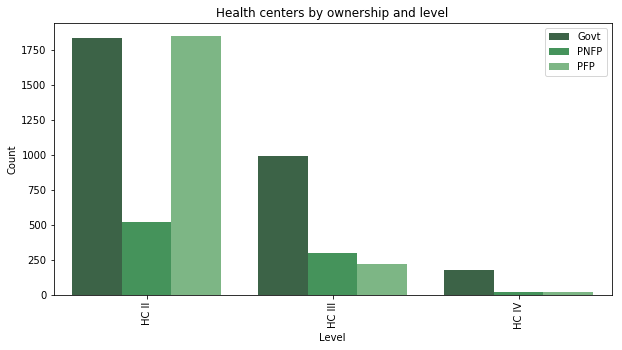

In [8]:
%matplotlib inline
hc = ['HC III', 'HC IV', 'HC II']
hosp = ['Hospital','Regional referral hospital', 'National referral hospital']

plt.figure(figsize=(10, 5))
sns.countplot(x='level', 
              hue='ownership', 
              data=facilities[facilities.level.isin(hc)], palette="Greens_d")
_ = plt.xlabel("Level")
_ = plt.xticks(rotation=90)
_ = plt.ylabel("Count")
_ = plt.title("Health centers by ownership and level")
_ = plt.legend()


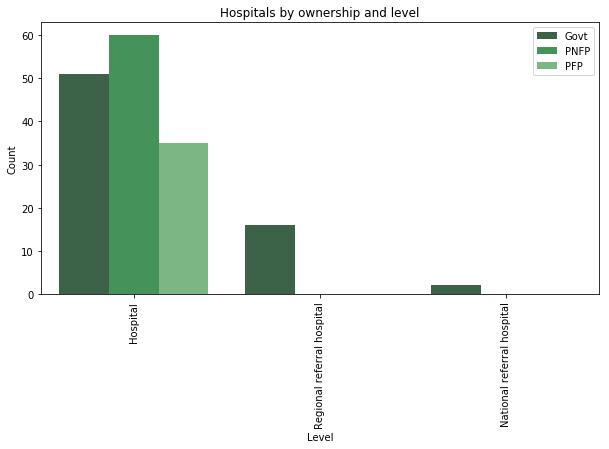

In [9]:
plt.figure(figsize=(10, 5))
sns.countplot(x='level', 
              hue='ownership', 
              data=facilities[facilities.level.isin(hosp)], palette="Greens_d")
_ = plt.xlabel("Level")
_ = plt.xticks(rotation=90)
_ = plt.ylabel("Count")
_ = plt.title("Hospitals by ownership and level")
_ = plt.legend()

In [10]:
# Facilities by hard-to-reach-hard-to-stay - absolute
reload(su)
print su.pt(
    pd.crosstab(
        facilities.is_hard_to_reach,
        [facilities.level]).T, 
    ["Not HTR", "HTR"], 
    "Facilities by hard-to-reach, abs.")



        Facilities by hard-to-reach, abs.         

|                            |   Not HTR |   HTR |
|:---------------------------|----------:|------:|
| Blood bank                 |         7 |     1 |
| Clinic                     |       199 |    58 |
| HC II                      |      3643 |   543 |
| HC III                     |      1287 |   208 |
| HC IV                      |       180 |    32 |
| Hospital                   |       127 |    19 |
| National referral hospital |         2 |     0 |
| Other                      |         6 |     0 |
| Regional referral hospital |        14 |     2 |
| Specialty clinic           |        24 |     2 |


In [11]:
# Facilities by hard-to-reach-hard-to-stay - per capita
reload(su)

# get population sizes
htr_pop = districts[districts.is_hard_to_reach == 1].population.sum()
non_htr_pop = districts[districts.is_hard_to_reach == 0].population.sum()

print su.pt(
    pd.DataFrame([[htr_pop,non_htr_pop]],
                 columns=['HTR', 'Non-HTR'],
                 index=['Population'])
    .applymap(su.fmt2sf), title="Population in HTR and non-HTR areas"
)

# make a 1-by-2 matrix; divide by 100,000 for per-100k
y = [[htr_pop/100000.0],[non_htr_pop/100000.0]]

# matrix division
x = np.divide(pd.crosstab(
    facilities.is_hard_to_reach, 
    [facilities.level]), 
    y)

# round to ~2 sigfig
x = x.applymap(su.fmt2sf)

print su.pt(x.T, ["Not HTR", "HTR"], "Facilities by hard-to-reach per 100k pop")



Population in HTR and non-HTR areas

|            | HTR   | Non-HTR   |
|:-----------|:------|:----------|
| Population | 53m   | 284m      |


     Facilities by hard-to-reach per 100k pop     

|                            |   Not HTR |   HTR |
|:---------------------------|----------:|------:|
| Blood bank                 |      0.13 |  0    |
| Clinic                     |      3.7  |  0.2  |
| HC II                      |     68    |  1.9  |
| HC III                     |     24    |  0.73 |
| HC IV                      |      3.4  |  0.11 |
| Hospital                   |      2.4  |  0.07 |
| National referral hospital |      0.04 |  0    |
| Other                      |      0.11 |  0    |
| Regional referral hospital |      0.26 |  0.01 |
| Specialty clinic           |      0.45 |  0.01 |


# Facilites added through employment records

In [12]:
import json
d = json.loads(facilities.iloc[2216].to_json()) # This is Kampala Independent Hospital, which has a similar profile
d['name'] = 'Kidac General Hospital'
facilities = facilities.append(d, ignore_index=True)

In [13]:
# drop the db_index row
facilities = facilities.drop('db_id', axis=1)

In [14]:
facilities = facilities.reset_index()
facilities = facilities.rename(columns={"index": "facility_id"})


In [15]:
facilities

,facility_id,id_within_district,hsd,name,level,authority,ownership,nhpi_code,hsdt_code,source,...,is_hard_to_reach,pop_per_health_fac,rural_pop,public_hosp,is_district,poverty_pop,is_city,distance_from_kampala,district_name_all_caps,prop_rural
0,0,1,Labwor HSD,Abim General Hospital,Hospital,MOH,Govt,HFA6Q7GB2,SCL79ULU0/PA95VLAL8/8001,mohdhi2017,...,1.0,6810.526367,108700.244141,1.0,2.0,0.742,0.0,840.0,ABIM,0.840033
1,1,2,Labwor HSD,Adea Health Centre II,HC II,MOH,Govt,HFZW8MEX9,SC5AFV6Y8/PALG8WW26/8001,mohdhi2017,...,1.0,6810.526367,108700.244141,1.0,2.0,0.742,0.0,840.0,ABIM,0.840033
2,2,3,Labwor HSD,Alerek Health Centre III,HC III,MOH,Govt,HF7929IC0,SC6R9JA36/PAPF4WK97/8001,mohdhi2017,...,1.0,6810.526367,108700.244141,1.0,2.0,0.742,0.0,840.0,ABIM,0.840033
3,3,4,Labwor HSD,Amita Health Centre II,HC II,MOH,Govt,HF6UQL949,SC4CK4A96/PAU7GHJT5/8001,mohdhi2017,...,1.0,6810.526367,108700.244141,1.0,2.0,0.742,0.0,840.0,ABIM,0.840033
4,4,5,Labwor HSD,Atunga Health Centre II,HC II,MOH,Govt,HFVQXNJN9,SC4CK4A96/PA9LUCGP9/8001,mohdhi2017,...,1.0,6810.526367,108700.244141,1.0,2.0,0.742,0.0,840.0,ABIM,0.840033
5,5,6,Labwor HSD,Awach Health Centre II,HC II,MOH,Govt,HF5ZOVFS0,SCWMDZEF2/PAL7LLZT2/8001,mohdhi2017,...,1.0,6810.526367,108700.244141,1.0,2.0,0.742,0.0,840.0,ABIM,0.840033
6,6,7,Labwor HSD,Gangming Health Centre II,HC II,MOH,Govt,HFX6RDUQ8,SCWMDZEF2/PA5JNW5M5/8001,mohdhi2017,...,1.0,6810.526367,108700.244141,1.0,2.0,0.742,0.0,840.0,ABIM,0.840033
7,7,8,Labwor HSD,Kanu Health Centre II,HC II,Protestant,PNFP,HFHGZKEV7,SC4CK4A96/PAA9PZSO4/8001,mohdhi2017,...,1.0,6810.526367,108700.244141,1.0,2.0,0.742,0.0,840.0,ABIM,0.840033
8,8,9,Labwor HSD,Katabok (Abim) Health Centre II,HC II,MOH,Govt,HFZE86YY7,SC5AFV6Y8/PAPPIFJD6/8001,mohdhi2017,...,1.0,6810.526367,108700.244141,1.0,2.0,0.742,0.0,840.0,ABIM,0.840033
9,9,10,Labwor HSD,Kiru Health Centre II,HC II,MOH,Govt,HFCASI731,SCL79ULU0/PAL37W5L0/8001,mohdhi2017,...,1.0,6810.526367,108700.244141,1.0,2.0,0.742,0.0,840.0,ABIM,0.840033


## Vacancies

We then looked at reported vacancies in the HRHIS audits from the HRHIS data repository <cite data-cite="hrhis2017"><a href="https://github.com/alexgoodell/uganda-model/blob/master/refs/cite-md/hrhis2017.md">(hrhis2017)</a></cite>.

These occur regularly and are posted [here](http://hris.health.go.ug/districts_manage/audit_summary_districts) with and archive [here](https://web.archive.org/web/20180329223027/http://hris.health.go.ug/districts_manage/audit_summary_districts). 

Since they are not easily downloadable, we wrote a script to do so.

### District-level

In [16]:
'''
# example url: http://hris.health.go.ug/districts_manage/audit_summary_districts?district=district%7C314
# the 303 at the end is a code. here are the codes for all the districts:
codes = [ 314, 301, 322, 323, 315, 324, 216, 316, 302, 
         303, 217, 218, 201, 420, 117, 219, 118, 220, 
         225, 416, 401, 431, 402, 202, 221, 119, 436, 
         120, 226, 317, 121, 304, 403, 417, 203, 418, 
         204, 318, 404, 405, 213, 429, 430, 101, 222, 
         122, 102, 205, 413, 414, 206, 406, 207, 112, 
         407, 103, 227, 419, 421, 408, 305, 319, 325, 
         306, 208, 228, 123, 422, 415, 432, 326, 307, 
         229, 104, 124, 114, 223, 320, 105, 409, 214, 
         209, 410, 423, 115, 308, 309, 106, 107, 108, 
         311, 116, 109, 230, 434, 224, 327, 310, 231, 
         424, 411, 328, 427, 329, 321, 312, 435, 210, 
         110, 428, 425, 433, 412, 232, 426, 215, 211, 
         111, 212, 113, 313, 330]
import urllib
import time

# download them - turned off for now since they are already downloaded
print "Downloading ",
for code in codes:
    print str(code) + "...",
    filename = config.data_path + "/ihris/ihris-district-raw-html/" + str(code) + ".html"
    url = "http://hris.health.go.ug/districts_manage/audit_summary_districts?district=district%7C" + str(code)
    urllib.urlretrieve (url, filename)
'''

'\n# example url: http://hris.health.go.ug/districts_manage/audit_summary_districts?district=district%7C314\n# the 303 at the end is a code. here are the codes for all the districts:\ncodes = [ 314, 301, 322, 323, 315, 324, 216, 316, 302, \n         303, 217, 218, 201, 420, 117, 219, 118, 220, \n         225, 416, 401, 431, 402, 202, 221, 119, 436, \n         120, 226, 317, 121, 304, 403, 417, 203, 418, \n         204, 318, 404, 405, 213, 429, 430, 101, 222, \n         122, 102, 205, 413, 414, 206, 406, 207, 112, \n         407, 103, 227, 419, 421, 408, 305, 319, 325, \n         306, 208, 228, 123, 422, 415, 432, 326, 307, \n         229, 104, 124, 114, 223, 320, 105, 409, 214, \n         209, 410, 423, 115, 308, 309, 106, 107, 108, \n         311, 116, 109, 230, 434, 224, 327, 310, 231, \n         424, 411, 328, 427, 329, 321, 312, 435, 210, \n         110, 428, 425, 433, 412, 232, 426, 215, 211, \n         111, 212, 113, 313, 330]\nimport urllib\nimport time\n\n# download them - turn

In [17]:
# Now that they are downloaded, load them up in Beautiful Soup
'''
from bs4 import BeautifulSoup
import urllib2
import csv
import time

def is_row_of_interest(tag):
    if tag.name == 'tr' and not tag.has_attr('class'): # skips the audit_subtotal row
        return True
    else:
        return False
    
import itertools, sys
spinner = itertools.cycle(['-', '/', '|', '\\']) # animation
print "Extracting from "
positions = []

codes = [ 314, 301, 322, 323, 315, 324, 216, 316, 302, 
         303, 217, 218, 201, 420, 117, 219, 118, 220, 
         225, 416, 401, 431, 402, 202, 221, 119, 436, 
         120, 226, 317, 121, 304, 403, 417, 203, 418, 
         204, 318, 404, 405, 213, 429, 430, 101, 222, 
         122, 102, 205, 413, 414, 206, 406, 207, 112, 
         407, 103, 227, 419, 421, 408, 305, 319, 325, 
         306, 208, 228, 123, 422, 415, 432, 326, 307, 
         229, 104, 124, 114, 223, 320, 105, 409, 214, 
         209, 410, 423, 115, 308, 309, 106, 107, 108, 
         311, 116, 109, 230, 434, 224, 327, 310, 231, 
         424, 411, 328, 427, 329, 321, 312, 435, 210, 
         110, 428, 425, 433, 412, 232, 426, 215, 211, 
         111, 212, 113, 313, 330]

for code in codes:
    print "{}".format(code), "...",
    filename = filename = config.data_path + "/ihris/ihris-district-raw-html/" + str(code) + ".html"
    html = open(filename)
    soup = BeautifulSoup(html, "html5lib")
    district_name = soup.find(attrs={'name':'district_name'}).string.split(',')[0]                   
    for fb in soup.find_all(class_='facility_block'):
        facility_name = fb.find(attrs={'name':'facility_name'}).string      
        for tr in fb.find("tbody").find_all(is_row_of_interest):
            title = tr.find(attrs={'name':'job+title'}).string
            salary_grade = tr.find(attrs={'name':'salary_grade+name'}).string
            num_positions = tr.find(attrs={'name':'primary_form+amount'}).string
            filled_positions = tr.find(attrs={'name':'+filled_positions'}).string
            vacancies = tr.find(attrs={'name':'+variance'}).string
            percent_filled = tr.find(attrs={'name':'+percentage_filled'}).string
            position = [district_name, facility_name, title, 
                        salary_grade, num_positions, 
                        filled_positions, vacancies, 
                        percent_filled]
            positions = positions + [position]
        sys.stdout.write(spinner.next())  # animation
        sys.stdout.flush()                # animation
        sys.stdout.write('\b')            # animation
    sys.stdout.write('\b\b')            # animation
print "Done"
vac_df_district = pd.DataFrame(positions, columns=["district_name", "facility_name", "title", 
                                       "salary_grade", "num_positions", "filled_positions", 
                                       "vacancies", "percent_filled"])
'''
vac_df_district = pd.read_csv(config.data_path + "/ihris/extracted-vacancies-district.csv")

In [18]:
vac_df_district

,Unnamed: 0,district_name,facility_name,title,salary_grade,num_positions,filled_positions,vacancies,percent_filled
0,0,ABIM,ABIM DHO's Office,District Health Officer,U1SE,1,1,0,100.0%
1,1,ABIM,ABIM DHO's Office,Assistant District Health Officer (Environment...,U1E,1,0,1,0.0%
2,2,ABIM,ABIM DHO's Office,Assistant District Health Officer - Maternal a...,U2(SC),1,1,0,100.0%
3,3,ABIM,ABIM DHO's Office,Senior Health Educator,U3(SC),1,0,1,0.0%
4,4,ABIM,ABIM DHO's Office,Bio-Statistician,U4(SC),1,1,0,100.0%
5,5,ABIM,ABIM DHO's Office,Senior Environmental Health Officer,U4(SC),1,0,1,0.0%
6,6,ABIM,ABIM DHO's Office,Health Inspector,U5(SC),0,2,-2,NaN
7,7,ABIM,ABIM DHO's Office,Stenographer Secretary,U5U,1,0,1,0.0%
8,8,ABIM,ABIM DHO's Office,Cold Chain Technician,U6U,1,1,0,100.0%
9,9,ABIM,ABIM DHO's Office,Stores Assistant,U7U,1,1,0,100.0%


### Regional referral hospitals

There were audits available for the 13 regional referral hospitals, available [here](
http://hris.health.go.ug/central_moh_referral/audit_report_open) with archive [here](
https://web.archive.org/web/20180329224335/http://hris.health.go.ug/central_moh_referral/audit_report_open).

Since it was not easily downloadable, a script was made that would download the raw HTML, and process it was a table using BeautifulSoup.

In [19]:
# example url: http://hris.health.go.ug/central_moh_referral/audit_report_open?district=district%7C303
# the 303 at the end is a code. here are the codes for all the hospitals:
codes = [303, 304, 403, 204, 404, 405, 307, 105, 209, 410, 308, 107, 211]

In [20]:
# download them - turned off for now since they are already downloaded
'''
import urllib
for code in codes:
    print "Downloading " +  str(code) + "..."
    filename = config.data_path + "/ihris/ihris-rrh-raw-html/" + str(code) + ".html"
    url = "http://hris.health.go.ug/central_moh_referral/audit_report_open?district=district%7C" + str(code)
    urllib.urlretrieve (url, filename)
'''

'\nimport urllib\nfor code in codes:\n    print "Downloading " +  str(code) + "..."\n    filename = config.data_path + "/ihris/ihris-rrh-raw-html/" + str(code) + ".html"\n    url = "http://hris.health.go.ug/central_moh_referral/audit_report_open?district=district%7C" + str(code)\n    urllib.urlretrieve (url, filename)\n'

In [21]:
'''
print "Extracting from "
positions = []

for code in codes:
    print "{}".format(code), "...",
    filename = filename = config.data_path + "/ihris/ihris-rrh-raw-html/" + str(code) + ".html"
    html = open(filename)
    soup = BeautifulSoup(html, "html5lib")
    district_name = soup.find(attrs={'name':'district_name'}).string.split(',')[0]                   
    for fb in soup.find_all(class_='facility_block'):
        facility_name = fb.find(attrs={'name':'facility_name'}).string      
        for tr in fb.find("tbody").find_all(is_row_of_interest):
            title = tr.find(attrs={'name':'job+title'}).string
            salary_grade = tr.find(attrs={'name':'salary_grade+name'}).string
            num_positions = tr.find(attrs={'name':'primary_form+amount'}).string
            filled_positions = tr.find(attrs={'name':'+filled_positions'}).string
            vacancies = tr.find(attrs={'name':'+variance'}).string
            percent_filled = tr.find(attrs={'name':'+percentage_filled'}).string
            position = [district_name, facility_name, title, 
                        salary_grade, num_positions, 
                        filled_positions, vacancies, 
                        percent_filled]
            positions = positions + [position]
        sys.stdout.write(spinner.next())  # animation
        sys.stdout.flush()                # animation
        sys.stdout.write('\b')            # animation
    sys.stdout.write('\b\b')            # animation
print "Done"
vac_df_rrh = pd.DataFrame(positions, columns=["district_name", "facility_name", "title", 
                                       "salary_grade", "num_positions", "filled_positions", 
                                       "vacancies", "percent_filled"])
'''
vac_df_rrh = pd.read_csv(config.data_path + "/ihris/extracted-vacancies-rrh.csv")

In [22]:
# Municipalities
'''
codes = [302, 303, 117, 402, 202, 120, 304, 403, 
         203, 204, 404, 405, 102, 205, 206, 406, 
         408, 305, 319, 208, 307, 105, 409, 209, 
         410, 115, 308, 108, 310, 411, 412, 211, 
         212, 113, 313]
import urllib
for code in codes:
    print "Downloading " +  str(code) + "..."
    filename = config.data_path + "/ihris/ihris-muni-raw-html/" + str(code) + ".html"
    url = "http://hris.health.go.ug/municipal_manage/audit_summary_districts?district=district%7C" + str(code)
    urllib.urlretrieve (url, filename)
'''

'\ncodes = [302, 303, 117, 402, 202, 120, 304, 403, \n         203, 204, 404, 405, 102, 205, 206, 406, \n         408, 305, 319, 208, 307, 105, 409, 209, \n         410, 115, 308, 108, 310, 411, 412, 211, \n         212, 113, 313]\nimport urllib\nfor code in codes:\n    print "Downloading " +  str(code) + "..."\n    filename = config.data_path + "/ihris/ihris-muni-raw-html/" + str(code) + ".html"\n    url = "http://hris.health.go.ug/municipal_manage/audit_summary_districts?district=district%7C" + str(code)\n    urllib.urlretrieve (url, filename)\n'

In [23]:
'''

def is_row_of_interest(tag):
    if tag.name == 'tr' and not tag.has_attr('class'): # skips the audit_subtotal row
        return True
    else:
        return False
import itertools, sys
spinner = itertools.cycle(['-', '/', '|', '\\']) # animation
print "Extracting from "
positions = []

    
print "Extracting from "
positions = []
codes = [302, 303, 117, 402, 202, 120, 304, 403, 
         203, 204, 404, 405, 102, 205, 206, 406, 
         408, 305, 319, 208, 307, 105, 409, 209, 
         410, 115, 308, 108, 310, 411, 412, 211, 
         212, 113, 313]
for code in codes:
    print "{}".format(code), "...",
    filename = filename = config.data_path + "/ihris/ihris-muni-raw-html/" + str(code) + ".html"
    html = open(filename)
    soup = BeautifulSoup(html, "html5lib")
    district_name = soup.find(attrs={'name':'district_name'}).string.split(',')[0]                   
    for fb in soup.find_all(class_='facility_block'):
        facility_name = fb.find(attrs={'name':'facility_name'}).string      
        for tr in fb.find("tbody").find_all(is_row_of_interest):
            title = tr.find(attrs={'name':'job+title'}).string
#             print title
            salary_grade = tr.find(attrs={'name':'salary_grade+name'}).string
            num_positions = tr.find(attrs={'name':'primary_form+amount'}).string
            filled_positions = tr.find(attrs={'name':'+filled_positions'}).string
            vacancies = tr.find(attrs={'name':'+variance'}).string
            try:
                percent_filled = tr.find(attrs={'name':'+percentange_filled'}).string
            except:
#                 print "error"
                percent_filled = 'NA'
            finally:
#                 print "error"
                percent_filled = 'NA'
            position = [district_name, facility_name, title, 
                        salary_grade, num_positions, 
                        filled_positions, vacancies, 
                        percent_filled]
            positions = positions + [position]
        sys.stdout.write(spinner.next())  # animation
        sys.stdout.flush()                # animation
        sys.stdout.write('\b')            # animation
    sys.stdout.write('\b\b')            # animation
print "Done"
vac_df_muni = pd.DataFrame(positions, columns=["district_name", "facility_name", "title", 
                                       "salary_grade", "num_positions", "filled_positions", 
                                       "vacancies", "percent_filled"])

'''

vac_df_muni = pd.read_csv(config.data_path + "/ihris/extracted-vacancies-muni.csv")

In [24]:
# The Uganda cancer institute has 1 unfilled post for Senior Anesthetic Officer, U4 Sc according to mps2016, see:
# https://github.com/alexgoodell/uganda-model/blob/master/refs/cite-md/mps2016.md

additional = [["KAMPALA", "Uganda Cancer Institute", "Senior Anaesthetic Officer", 
                        "U4(SC)", 1, 0, 1, "100%"]]
ugi_df = pd.DataFrame(additional, columns=["district_name", "facility_name", "title", 
                                       "salary_grade", "num_positions", "filled_positions", 
                                       "vacancies", "percent_filled"])







In [25]:
 
'''
code = 102
print "Downloading " +  "..."
filename = config.data_path + "/ihris/ihris-uhi-raw-html/" + str(code) + ".html"
url = "http://hris.health.go.ug/uhi/audit_summary_districts?district=district%7C" + str(code)
urllib.urlretrieve (url, filename)
'''

'\ncode = 102\nprint "Downloading " +  "..."\nfilename = config.data_path + "/ihris/ihris-uhi-raw-html/" + str(code) + ".html"\nurl = "http://hris.health.go.ug/uhi/audit_summary_districts?district=district%7C" + str(code)\nurllib.urlretrieve (url, filename)\n'

### National referral hospitals

There is no vacancy data available for Mulago in the iHRHIS system. However there is data through 2015 HRH audit <cite data-cite="hrhaudit2015"><a href="https://github.com/alexgoodell/uganda-model/blob/master/refs/cite-md/hrhaudit2015.md">(hrhaudit2015)</a></cite>. Which also has data concerning the PNFP institutions:
[Supporting image](https://github.com/alexgoodell/uganda-model/blob/master/docs/imgs/Wkbba4HGbQ.jpg)

#### Mulago & Butabika National Referral Hospital

per <a href="https://github.com/alexgoodell/uganda-model/blob/master/refs/cite-md/hrhaudit2015.md">(hrhaudit2015)</a></cite>

| District |               Facility              |                    Title                    | Salary grade | Positions | Filled | Vac |
|----------|-------------------------------------|---------------------------------------------|--------------|-----------|--------|-----|
| KAMPALA  | Mulago National Referral Hospital   | Consultant Anaesthetist                     | U1SE         |         5 |      1 |   4 |
| KAMPALA  | Mulago National Referral Hospital   | Senior Consultant Anaesthetist              | U1SE         |         1 |      1 |   0 |
| KAMPALA  | Mulago National Referral Hospital   | Medical Officer Special Grade - Anaesthesia | U2(SC)       |         5 |      2 |   3 |
| KAMPALA  | Mulago National Referral Hospital   | Principal Anaesthetic Officer               | U3(SC)       |         1 |      0 |   1 |
| KAMPALA  | Mulago National Referral Hospital   | Senior Anaesthetic Officer                  | U4(SC)       |        23 |     14 |   9 |
| KAMPALA  | Mulago National Referral Hospital   | Anaesthetic Officer                         | U5(SC)       |         3 |      1 |   2 |
| KAMPALA  | Mulago National Referral Hospital   | Anaesthetic Attendent                       | U8U          |         5 |      5 |   0 |
| KAMPALA  | Butabika National Referral Hospital | Anaesthetic Officer                         | U5(SC)       |         1 |      1 |   0 |




In [26]:
x = [['KAMPALA' , 'Mulago National Referral Hospital' , 'Consultant Anaesthetist' , 'U1SE '    ,         5 ,      1 ,   4],
['KAMPALA' , 'Mulago National Referral Hospital' , 'Senior Consultant Anaesthetist           ' , 'U1SE '    ,         1 ,      1 ,   0],
['KAMPALA' , 'Mulago National Referral Hospital' , 'Medical Officer Special Grade - Anaesthesia' , 'U2(SC) '    ,         5 ,      2 ,   3],
['KAMPALA' , 'Mulago National Referral Hospital' , 'Principal Anaesthetic Officer            ' , 'U3(SC) '    ,         1 ,      0 ,   1],
['KAMPALA' , 'Mulago National Referral Hospital' , 'Senior Anaesthetic Officer               ' , 'U4(SC) '    ,        23 ,     14 ,   9],
['KAMPALA' , 'Mulago National Referral Hospital' , 'Anaesthetic Officer' , 'U5(SC) '    ,         3 ,      1 ,   2],
['KAMPALA' , 'Mulago National Referral Hospital' , 'Anaesthetic Attendent                    ' , 'U8U  '    ,         5 ,      5 ,   0],
['KAMPALA' , 'Butabika National Referral Hospital' , 'Anaesthetic Officer' , 'U5(SC) '    ,         1 ,      1 ,   0]]

vac_df_nrh = pd.DataFrame(x, columns=["district_name", "facility_name", "title", 
                                       "salary_grade", "num_positions", "filled_positions", 
                                       "vacancies"])
# strip whitespace
vac_df_nrh.facility_name = vac_df_nrh.facility_name.apply(lambda x: str(x).strip())
vac_df_nrh.title = vac_df_nrh.title.apply(lambda x: str(x).strip())
vac_df_nrh.salary_grade = vac_df_nrh.salary_grade.apply(lambda x: str(x).strip())

#### Uganda heart institute

These data sets do not include the national referral hospitals or their affiliated institutes.
The Uganda heart institute publishes their data through the hrhis system <cite data-cite="hrhis2017"><a href="https://github.com/alexgoodell/uganda-model/blob/master/refs/cite-md/hrhis2017.md">(hrhis2017)</a></cite>.

In [27]:
'''
print "Extracting from "
positions = []
codes = [102]
for code in codes:
    print "{}".format(code), "...",
    filename = filename = config.data_path + "/ihris/ihris-uhi-raw-html/" + str(code) + ".html"
    html = open(filename)
    soup = BeautifulSoup(html, "html5lib")
    district_name = soup.find(attrs={'name':'district_name'}).string.split(',')[0]                   
    for fb in soup.find_all(class_='facility_block'):
        facility_name = fb.find(attrs={'name':'facility_name'}).string      
        for tr in fb.find("tbody").find_all(is_row_of_interest):
            title = tr.find(attrs={'name':'job+title'}).string
            print title
            salary_grade = tr.find(attrs={'name':'salary_grade+name'}).string
            num_positions = tr.find(attrs={'name':'primary_form+amount'}).string
            filled_positions = tr.find(attrs={'name':'+filled_positions'}).string
            vacancies = tr.find(attrs={'name':'+variance'}).string
            try:
                percent_filled = tr.find(attrs={'name':'+percentange_filled'}).string
            except:
                print "error"
                percent_filled = 'NA'
            finally:
                print "error"
                percent_filled = 'NA'
            position = [district_name, facility_name, title, 
                        salary_grade, num_positions, 
                        filled_positions, vacancies, 
                        percent_filled]
            positions = positions + [position]
        sys.stdout.write(spinner.next())  # animation
        sys.stdout.flush()                # animation
        sys.stdout.write('\b')            # animation
    sys.stdout.write('\b\b')            # animation
print "Done"
vac_df_uhi = pd.DataFrame(positions, columns=["district_name", "facility_name", "title", 
                                       "salary_grade", "num_positions", "filled_positions", 
                                       "vacancies", "percent_filled"])
'''
vac_df_uhi = pd.read_csv(config.data_path + "/ihris/extracted-vacancies-uhi.csv")

### Private not for profit

Info via 2015 HRH audit <cite data-cite="hrhaudit2015"><a href="https://github.com/alexgoodell/uganda-model/blob/master/refs/cite-md/hrhaudit2015.md">(hrhaudit2015)</a></cite>. Data tables:
[Supporting image](https://github.com/alexgoodell/uganda-model/blob/master/docs/imgs/Wkbba4HGbQ.jpg)

The catholic charity hospitals and HCIVs are well-staffed as a whole. 
GH's 95% filled. [Supporting image](https://github.com/alexgoodell/uganda-model/blob/master/docs/imgs/7Jte8KzYGR.jpg)
HCIV's 64% filled. [Supporting image](https://github.com/alexgoodell/uganda-model/blob/master/docs/imgs/X8jCh7Iz3i.jpg)

protestant (UPMB) less well-staffed [Supporting image](https://github.com/alexgoodell/uganda-model/blob/master/docs/imgs/orBYNEjwbv.jpg)

Overall staffing Data tables:
[Supporting image](https://github.com/alexgoodell/uganda-model/blob/master/docs/imgs/Wkbba4HGbQ.jpg)

| PNFP group | Title | Positions | Filled | Vac |
|--|
|Catholic |Unspecified Anaesthetic Cadre | 157 | 110 | 47 |
|Protestant |Unspecified Anaesthetic Cadre |103| 32 |71|
|Muslim |Unspecified Anaesthetic Cadre |31 |5| 26|

#### Protestant facilities

listed in hrhis <cite data-cite="hrhis2017"><a href="https://github.com/alexgoodell/uganda-model/blob/master/refs/cite-md/hrhis2017.md">(hrhis2017)</a></cite>

protestant (UPMB) less well-staffed than catholic charities [Supporting image](https://github.com/alexgoodell/uganda-model/blob/master/docs/imgs/orBYNEjwbv.jpg)

In [28]:
# protestants listed in hrhis
'''
codes = [29, 80, 3, 46, 66, 7, 76, 97, 1, 77, 8, 9, 53, 
         50, 24, 73, 78, 31, 100, 12, 111, 68, 13, 45, 
         60, 14, 59, 61, 15, 105, 18, 19, 74, 65, 21, 86]
import urllib
for code in codes:
    print "Downloading " +  str(code) + "..."
    filename = config.data_path + "/ihris/ihris-prot-raw-html/" + str(code) + ".html"
    url = "http://hris.upmb.co.ug:8080/upmb/quarterly_audit_summary_districts?district=district%7C" + str(code)
    urllib.urlretrieve (url, filename)
'''
_ = _

In [29]:
'''
def is_row_of_interest(tag):
    if tag.name == 'tr' and not tag.has_attr('class'): # skips the audit_subtotal row
        return True
    else:
        return False
import itertools, sys
spinner = itertools.cycle(['-', '/', '|', '\\']) # animation

print "Extracting from "
positions = []
codes = [29, 80, 3, 46, 66, 7, 76, 97, 1, 77, 8, 9, 53, 
         50, 24, 73, 78, 31, 100, 12, 111, 68, 13, 45, 
         60, 14, 59, 61, 15, 105, 18, 19, 74, 65, 21, 86]
for code in codes:
    print "{}".format(code), "...",
    filename = filename = config.data_path + "/ihris/ihris-prot-raw-html/" + str(code) + ".html"
    html = open(filename)
    soup = BeautifulSoup(html, "html5lib")
    district_name = soup.find(attrs={'name':'district_name'}).string.split(',')[0]                   
    for fb in soup.find_all(class_='facility_block'):
        facility_name = "Protestant " + fb.find(attrs={'name':'facility_type_name'}).string      
        for tr in fb.find("tbody").find_all(is_row_of_interest):
            title = tr.find(attrs={'name':'job+title'}).string
            salary_grade = tr.find(attrs={'name':'salary_grade+name'}).string
            num_positions = tr.find(attrs={'name':'amount'}).string
            filled_positions = tr.find(attrs={'name':'filled'}).string
            vacancies = tr.find(attrs={'name':'variance'}).string
            try:
                percent_filled = tr.find(attrs={'name':'percentange_filled'}).string
            except:
                percent_filled = 'NA'
            finally:
                percent_filled = 'NA'
            position = [district_name, facility_name, title, 
                        salary_grade, num_positions, 
                        filled_positions, vacancies, 
                        percent_filled]
            positions = positions + [position]
        sys.stdout.write(spinner.next())  # animation
        sys.stdout.flush()                # animation
        sys.stdout.write('\b')            # animation
    sys.stdout.write('\b\b')            # animation
print "Done"
vac_df_prot = pd.DataFrame(positions, columns=["district_name", "facility_name", "title", 
                                       "salary_grade", "num_positions", "filled_positions", 
                                       "vacancies", "percent_filled"])
'''
# vac_df_prot.to_csv(config.data_path + "/ihris/extracted-vacancies-prot.csv")
vac_df_prot = pd.read_csv(config.data_path + "/ihris/extracted-vacancies-prot.csv")

#### Uganda Muslim Medical Bureau (UMMB)

Uganda Muslim Medical Bureau (UMMB) poor staffing. [Supporting image](https://github.com/alexgoodell/uganda-model/blob/master/docs/imgs/tRtUPie730.jpg) Uganda Muslim Medical Bureau (UMMB) general hosptials: 0 of 15 AO positions filled. 1 of 0 AAs. 0 of 10 attendents. [Supporting image](https://github.com/alexgoodell/uganda-model/blob/master/docs/imgs/l4JQ5CeXWH.jpg). Uganda Muslim Medical Bureau (UMMB) hc IVs: 0 of 2 AO positions filled. 0 of 4 AAs. [Supporting image](https://github.com/alexgoodell/uganda-model/blob/master/docs/imgs/Jo84jeHTxE.jpg)

Following data from 2015 HRH audit <cite data-cite="hrhaudit2015"><a href="https://github.com/alexgoodell/uganda-model/blob/master/refs/cite-md/hrhaudit2015.md">(hrhaudit2015)</a></cite>.

In [30]:
x = [ ['Unknown district', 'Saidina General Hospital - Muslim - Muslim', 'Anaesthetic Officer', '', 3, 0,''],
    ['Unknown district', 'Saidina General Hospital - Muslim', 'Anaesthetic Assistant', '', 0, 0,''],
    ['Unknown district', 'Saidina General Hospital - Muslim', 'Anaesthetic Attendant', '', 2, 0,''],
    ['Unknown district', 'Kiuli General Hospital - Muslim', 'Anaesthetic Officer', '', 3, 0,''],
    ['Unknown district', 'Kiuli General Hospital - Muslim', 'Anaesthetic Assistant', '', 0, 0,''],
    ['Unknown district', 'Kiuli General Hospital - Muslim', 'Anaesthetic Attendant', '', 2, 0,''],
    ['Unknown district', 'Old Kampala General Hospital - Muslim', 'Anaesthetic Officer', '', 3, 0,''],
    ['Unknown district', 'Old Kampala General Hospital - Muslim', 'Anaesthetic Assistant', '', 0, 1,''],
    ['Unknown district', 'Old Kampala General Hospital - Muslim', 'Anaesthetic Attendant', '', 2, 0,''],
    ['Unknown district', 'Buwenge General Hospital - Muslim', 'Anaesthetic Officer', '', 3, 0,''],
    ['Unknown district', 'Buwenge General Hospital - Muslim', 'Anaesthetic Assistant', '', 0, 0,''],
    ['Unknown district', 'Buwenge General Hospital - Muslim', 'Anaesthetic Attendant', '', 2, 0,''],
    ['Unknown district', 'Oriajin General Hospital - Muslim', 'Anaesthetic Officer', '', 3, 0,''],
    ['Unknown district', 'Oriajin General Hospital - Muslim', 'Anaesthetic Assistant', '', 0, 0,''],
    ['Unknown district', 'Oriajin General Hospital - Muslim', 'Anaesthetic Attendant', '', 2, 0,''],
    ['Unknown district', 'JINJA Health Center IV - Muslim', 'Anaesthetic Attendent', '', 1, 0,''],
    ['Unknown district', 'JINJA Health Center IV - Muslim', 'Anaesthetic Assistant', '', 2, 0,''],
    ['Unknown district', 'Ahamadiyyah IV - Muslim', 'Anaesthetic Attendant', '', 1, 0,''],
    ['Unknown district', 'Ahamadiyyah IV - Muslim', 'Anaesthetic Assistant', '', 2, 0,''] ]
    
vac_df_mus = pd.DataFrame(x, columns=["district_name", "facility_name", "title", 
                                       "salary_grade", "num_positions", "filled_positions", 
                                       "vacancies"])
# fill vacancies
vac_df_mus["vacancies"] = vac_df_mus["num_positions"] - vac_df_mus["filled_positions"]

#### Orthodox

Only one facility with an anesthesia provider, or requirement for one. <cite data-cite="hrhis2017"><a href="https://github.com/alexgoodell/uganda-model/blob/master/refs/cite-md/hrhis2017.md">(hrhis2017)</a></cite>

In [31]:
x = [['KAMPALA', 'HOLY CROSS ORTHODOX MISSION HOSPITAL', 'Anaesthetic Officer', 'U5(SC)', 3, 0, -1]]
vac_df_orth = pd.DataFrame(x, columns=["district_name", "facility_name", "title", 
                                       "salary_grade", "num_positions", "filled_positions", 
                                       "vacancies"])

#### Catholic

The catholic charity hospitals and HCIVs are well-staffed as a whole. 
GH's 95% filled. [Supporting image](https://github.com/alexgoodell/uganda-model/blob/master/docs/imgs/7Jte8KzYGR.jpg)
HCIV's 64% filled. [Supporting image](https://github.com/alexgoodell/uganda-model/blob/master/docs/imgs/X8jCh7Iz3i.jpg)

They did not provide differentiation of cadres in any HRH audit since 2010, when they have MDs 36 AO, 31 AAs in 2010  [Supporting image](https://github.com/alexgoodell/uganda-model/blob/master/docs/imgs/7iv6NqxToJ.jpg). They do report 
110 'Anaesthetic Cadre' [Supporting image](https://github.com/alexgoodell/uganda-model/blob/master/docs/imgs/Wkbba4HGbQ.jpg). 

We will add those.


In [32]:
x = [ ['Unknown district', 'Unknown Catholic Charity Facility', 'Unspecified Anaesthetic Cadre', '', 157, 110, 47] ]
vac_df_cath = pd.DataFrame(x, columns=["district_name", "facility_name", "title", 
                                       "salary_grade", "num_positions", "filled_positions", 
                                       "vacancies"])

In [33]:
# combine the dataframes
vac_df = vac_df_rrh \
            .append(vac_df_district) \
            .append(vac_df_uhi) \
            .append(vac_df_muni) \
            .append(vac_df_nrh) \
            .append(vac_df_prot) \
            .append(vac_df_mus) \
            .append(vac_df_cath) \
            .append(vac_df_orth) \
            .append(ugi_df)

In [34]:
# how many districts have been represented? 122=all
len(vac_df.district_name.unique()) # 123 because +1 for "unknown"

123

In [35]:
# Let's find the relevant anesthesia positions
all_titles = vac_df.title.unique()

## get anything with 'anes' or 'anaes'
import re
matching = []
for title in all_titles:
    print title,
    if re.search(r'anes', title, re.IGNORECASE) or re.search(r'ana', title, re.IGNORECASE):
        print '...included...', 
        matching = matching + [title]
    else:
        print '..',  
print "\n\n Matching: " + str(matching)

Hospital Director .. Consultant  - Pathology .. Consultant - Anaesthesia ...included... Consultant - Ear, Nose and Throat (ENT) .. Consultant - Medicine .. Consultant - Obstetrics and Gynaecology .. Consultant - Opthalmology .. Consultant - Orthopaedics .. Consultant - Paediatrics .. Consultant - Psychiatry .. Consultant - Public Health .. Consultant - Radiology .. Senior Consultant - Obstetrics and Gynaecology .. Senior Consultant - Paediatrics .. Medical Officer Special Grade - Dentistry .. Medical Officer Special Grade - Ear, Nose and Throat .. Medical Officer Special Grade - General Surgery .. Medical Officer Special Grade - Medicine .. Medical Officer Special Grade - Obstetrics and Gynaecology .. Medical Officer Special Grade - Ophthalmology .. Medical Officer Special Grade - Orthopaedics .. Medical Officer Special Grade - Paediatrics .. Medical Officer Special Grade - Psychiatry .. Medical Officer Special Grade - Public Health .. Medical Officer Special Grade - Radiology .. Princ

In [36]:
# These appear to be the relevant titles
anes_titles = ['Consultant - Anaesthesia', 'Principal Anaesthetic Officer', 
 'Senior Anaesthetic Officer', 'Anaesthetic Officer', 
 'Anaesthetic Attendant', 'Medical Officer Special Grade - Anaesthesia', 
 'Anaesthetic officer', 'Anaesthetic Assistant', 
 'Senior Anaesthetic officer', 'Senior Consultant - Anaesthesia', 
 'Senior Consultant - Cardiac Anaesthesia', 'Consultant - Cardiac Anaesthesia', 
 'Medical Officer - Cardiac Anaesthesia', 'Medical Officer Special Grade - Cardiac Anaesthesia',
 'Consultant Anaesthetist', 'Senior Consultant Anaesthetist', 
 'Anaesthetic Attendent', 'Unspecified Anaesthetic Cadre']

ao_titles = ['Senior Anaesthetic Officer', 'Anaesthetic officer', 
             'Anaesthetic Officer', 'Principal Anaesthetic Officer', 
             'Senior Anaesthetic officer']
md_titles = ['Senior Consultant - Cardiac Anaesthesia', 
             'Senior Consultant - Anaesthesia', 
             'Consultant - Cardiac Anaesthesia',
             'Medical Officer Special Grade - Anaesthesia',
             'Medical Officer - Cardiac Anaesthesia',
             'Medical Officer Special Grade - Cardiac Anaesthesia',
             'Consultant - Anaesthesia',
             'Consultant Anaesthetist',
             'Senior Consultant Anaesthetist']
att_titles = ['Anaesthetic Attendant', 'Anaesthetic Attendent']
assitant_titles = ['Anaesthetic Assistant']
unknown_titles = ['Unspecified Anaesthetic Cadre']

# restrict to just those titles
adf = copy.deepcopy(vac_df[vac_df.title.isin(anes_titles)])

In [37]:
# Rename duplicates
adf.loc[adf.title == "Senior Anaesthetic officer", "title"] = "Senior Anaesthetic Officer"
adf.loc[adf.title == "Anaesthetic officer", "title"] = "Anaesthetic Officer"
adf.loc[adf.title == "Anaesthetic Attendent", "title"] = "Anaesthetic Attendant"
adf.loc[adf.title == "Consultant Anaesthetist", "title"] = "Consultant - Anaesthesia"
adf.loc[adf.title == "Senior Consultant Anaesthetist", "title"] = "Senior Consultant - Anaesthesia"

pd.crosstab(adf.title,[adf.salary_grade])

salary_grade,,U1SE,U2(SC),U3(SC),U4(SC),U5(SC),U7U,U8U
title,,,,,,,,
Anaesthetic Assistant,7,0,0,0,0,0,210,0
Anaesthetic Attendant,7,0,0,0,0,0,0,112
Anaesthetic Officer,5,0,0,0,0,317,0,0
Consultant - Anaesthesia,0,19,0,0,0,0,0,0
Consultant - Cardiac Anaesthesia,0,1,0,0,0,0,0,0
Medical Officer - Cardiac Anaesthesia,0,0,0,0,1,0,0,0
Medical Officer Special Grade - Anaesthesia,0,0,14,0,0,0,0,0
Medical Officer Special Grade - Cardiac Anaesthesia,0,0,1,0,0,0,0,0
Principal Anaesthetic Officer,0,0,0,19,0,0,0,0


In [38]:
# create simple titles
adf.loc[adf.title.isin(ao_titles), "simple_title"] = "AO"
adf.loc[adf.title.isin(md_titles), "simple_title"] = "Medical Officer Anaesthetist"
adf.loc[adf.title.isin(att_titles), "simple_title"] = "Anaesthetic Attendent"
adf.loc[adf.title.isin(assitant_titles), "simple_title"] = "Anaesthetic Assistant"
adf.loc[adf.title.isin(unknown_titles), "simple_title"] = "Unknown Anaesthetic Cadre"

In [39]:
# Clean salary grade
adf.loc[adf.title == "Anaesthetic Assistant", "salary_grade"] = 'U7U'
adf.loc[adf.title == "Anaesthetic Attendant", "salary_grade"] = 'U8U'
adf.loc[adf.title == "Anaesthetic Officer", "salary_grade"] = 'U5(SC)'
pd.crosstab(adf.title,[adf.salary_grade])

salary_grade,,U1SE,U2(SC),U3(SC),U4(SC),U5(SC),U7U,U8U
title,,,,,,,,
Anaesthetic Assistant,0,0,0,0,0,0,242,0
Anaesthetic Attendant,0,0,0,0,0,0,0,119
Anaesthetic Officer,0,0,0,0,0,347,0,0
Consultant - Anaesthesia,0,19,0,0,0,0,0,0
Consultant - Cardiac Anaesthesia,0,1,0,0,0,0,0,0
Medical Officer - Cardiac Anaesthesia,0,0,0,0,1,0,0,0
Medical Officer Special Grade - Anaesthesia,0,0,14,0,0,0,0,0
Medical Officer Special Grade - Cardiac Anaesthesia,0,0,1,0,0,0,0,0
Principal Anaesthetic Officer,0,0,0,19,0,0,0,0


In [40]:
# salary grades - per salary2015
salary_grade = {}
salary_grade['U1SE'] = [ 31536897 , 41364784 ]
salary_grade['U3(SC)'] = [ 14451457 , 16684564 ]
salary_grade['U4(SC)'] = [ 13074396 , 14132259 ]
salary_grade['U5(SC)'] = [ 7500804 , 9514623 ]
salary_grade['U8U'] = [ 2518307 , 2844832 ]
salary_grade['U2(SC)'] = [ 20738240 , 24699315 ]
salary_grade['U7U'] = [ 3796711 , 4533367 ]
salary_grade['Unknown'] = [ np.nan , np.nan ]
salary_grade[''] = [ np.nan , np.nan ]

adf.loc[:, 'salary_low_ush'] = adf.salary_grade.fillna('Unknown').apply(lambda x: salary_grade[x][0])
adf.loc[:, 'salary_high_ush'] = adf.salary_grade.fillna('Unknown').apply(lambda x: salary_grade[x][1])

adf.loc[:, 'salary_low_usd'] = adf.loc[:, 'salary_low_ush'] * 0.00027
adf.loc[:, 'salary_high_usd'] = adf.loc[:, 'salary_high_ush'] * 0.00027

# compare to gdp per capita 
# world bank 2016 [Supporting image](https://github.com/alexgoodell/uganda-model/blob/master/docs/imgs/QmG1AK1Ypv.jpg)
ug_gdp_per_capita_usd = 580.4 
adf.loc[:, 'salary_per_gdp_low'] = adf.loc[:, 'salary_low_usd'] / ug_gdp_per_capita_usd
adf.loc[:, 'salary_per_gdp_high'] = adf.loc[:, 'salary_high_usd'] / ug_gdp_per_capita_usd

In [41]:
# add geographic data

adf = adf.join(districts.set_index("district_name_all_caps"), on="district_name", how='left', lsuffix="_d")

In [42]:
# fix numbers

adf.loc[:,"num_positions"] = adf.num_positions.astype('int64')
adf.loc[:,"filled_positions"] = adf.filled_positions.astype('int64')
adf.loc[:,"vacancies"] = adf.vacancies.astype('int64')
adf.loc[:,"percent_filled"] = adf.filled_positions.astype('float64') / adf.num_positions.astype('float64')


In [43]:
# Averages at general hospitals

pd.pivot_table(adf[adf.facility_name.apply(lambda x: "General Hospital" in x)], values=['num_positions','filled_positions', 'vacancies'], index=['title'], aggfunc=np.mean)

,filled_positions,num_positions,vacancies
title,,,
Anaesthetic Assistant,0.227273,1.727273,-1.590909
Anaesthetic Attendant,0.000000,2.160000,-0.880000
Anaesthetic Officer,0.651163,3.209302,-1.674419


In [44]:
pd.pivot_table(adf, values=['num_positions','filled_positions', 'vacancies'], index=['simple_title'], aggfunc=np.sum)

,filled_positions,num_positions,vacancies
simple_title,,,
AO,225,786,339
Anaesthetic Assistant,61,472,263
Anaesthetic Attendent,35,230,119
Medical Officer Anaesthetist,9,92,83
Unknown Anaesthetic Cadre,110,157,47


In [45]:
pd.pivot_table(adf, values=['num_positions','filled_positions', 'vacancies'], index=['title'], aggfunc=np.sum)

,filled_positions,num_positions,vacancies
title,,,
Anaesthetic Assistant,61,472,263
Anaesthetic Attendant,35,230,119
Anaesthetic Officer,181,599,196
Consultant - Anaesthesia,2,43,41
Consultant - Cardiac Anaesthesia,0,1,1
Medical Officer - Cardiac Anaesthesia,1,1,0
Medical Officer Special Grade - Anaesthesia,3,38,35
Medical Officer Special Grade - Cardiac Anaesthesia,1,2,1
Principal Anaesthetic Officer,4,19,15


In [46]:
# by salary

vac_by_grade = pd.pivot_table(adf, values=['num_positions','filled_positions', 'vacancies'], index=['salary_grade'], aggfunc=np.sum)
salary_by_grade = pd.pivot_table(adf, values=['salary_per_gdp_high', 'salary_per_gdp_low'], index=['salary_grade'], aggfunc=np.mean)



by_grade = vac_by_grade.join(salary_by_grade, how="left")
x = ['Unknown cadre', 'Consultant', 'Medical Officer Special Grade', 'Principle AO', 'Senior AO', 'AO', 'Anesthetic Assistant', 'Anesthetic Attendent']
by_grade['Cadre'] = pd.Series(x, index=by_grade.index)
by_grade.sort_values('salary_per_gdp_high').set_index('Cadre')


,filled_positions,num_positions,vacancies,salary_per_gdp_high,salary_per_gdp_low
Cadre,,,,,
Anesthetic Attendent,35,230,119,1.323406,1.171507
Anesthetic Assistant,61,472,263,2.108906,1.766216
AO,181,599,196,4.426169,3.489347
Senior AO,41,169,128,6.574276,6.082162
Principle AO,4,19,15,7.761599,6.722766
Medical Officer Special Grade,4,40,36,11.490033,9.647355
Consultant,4,51,47,19.242749,14.670851
Unknown cadre,110,157,47,NaN,NaN


In [48]:
in_kampala = pd.pivot_table(adf[adf.district_name=="Kampala District"], values=['filled_positions'], index=['salary_grade'], aggfunc=np.sum)
not_in_kampala_not_htr = pd.pivot_table(adf[(adf.district_name!="Kampala District") & (adf.is_hard_to_reach==0)], values=['filled_positions'], index=['salary_grade'], aggfunc=np.sum)
in_htr = pd.pivot_table(adf[adf.is_hard_to_reach==1], values=['filled_positions'], index=['salary_grade'], aggfunc=np.sum)

by_grade['filled_in_kampala'] = in_kampala
by_grade['filled_not_in_kampala_not_htr'] = not_in_kampala_not_htr
by_grade['filled_in_htr'] = in_htr

by_grade.to_csv(config.tmp_path + "/by_grade.csv")

# Export facilities to tmp